In [107]:
import numpy as np 
from sklearn.datasets import make_classification 
import pandas as pd 
import matplotlib.pyplot as plt 

In [108]:
x , y = make_classification(n_samples = 200 , n_features = 2 , n_informative = 1 ,n_redundant = 0 ,  n_classes = 2 , n_clusters_per_class = 1 , random_state = 41 , hypercube = False , class_sep = 10)

In [109]:
x

array([[ 0.46129481,  0.11056322],
       [ 0.49245852, -0.36693832],
       [ 0.18428489,  1.84676898],
       [-1.29125028,  0.00418963],
       [-1.9900335 ,  0.96772898],
       [-1.31724679, -1.09139336],
       [-1.27252874, -1.81830687],
       [-2.0957009 ,  0.37654946],
       [-1.77847655,  0.39327673],
       [ 0.22867881,  0.67795229],
       [-1.98915756, -0.89289622],
       [-2.14633183,  1.47991859],
       [ 0.27079872,  0.35699668],
       [ 0.24131273, -1.95074477],
       [ 0.72786019,  0.19072918],
       [ 0.59892582, -0.30483182],
       [-1.06679305,  1.76915945],
       [-1.79678671, -0.42450514],
       [-2.34164155, -0.2235331 ],
       [-1.78728974, -1.00806169],
       [-1.81570877,  0.81824865],
       [-0.95518193,  0.28637626],
       [ 0.22662562,  0.91057879],
       [-2.17114644, -0.97484942],
       [ 0.15566961, -1.2957083 ],
       [-0.90832387,  0.89730688],
       [-1.09821548,  0.14245455],
       [-1.18533933, -0.26370921],
       [ 0.14824607,

In [110]:
y

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0])

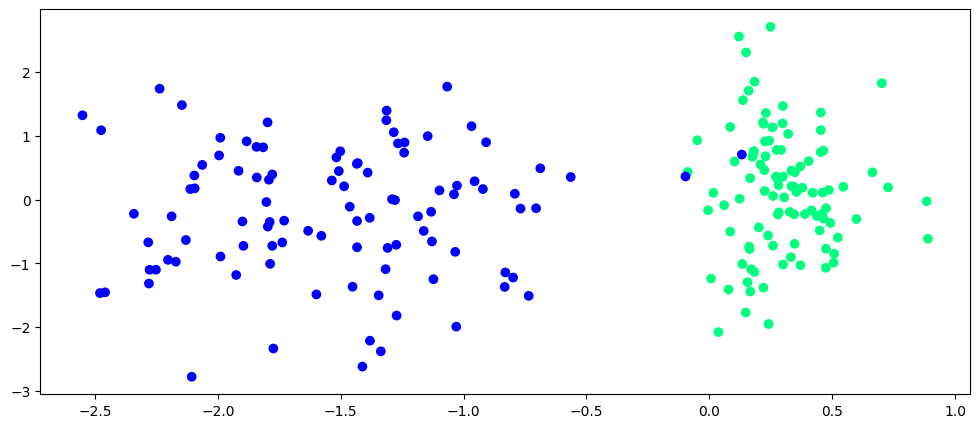

In [111]:
plt.figure(figsize=(12,5))
plt.scatter(x[: , 0] ,  x[: , 1] , c = y , cmap='winter')

In [112]:
x_test = np.linspace(-3 , 2, 100)

In [113]:
def step(z) : 
    if z >= 0 : 
        return 1 
    else : 
        return 0 
    
def perceptronTric(x , y, epoch = 1000 , learningRate = 0.01): 
    x = np.insert(x , 0 , 1, axis = 1) 
    weights = np.ones(x.shape[1])
    for i in range(epoch) : 
        random_idx = np.random.randint(0 , x.shape[0])
        y_hat = step(np.dot(weights , x[random_idx]))
        weights = weights + learningRate * (y[random_idx] - y_hat) * x[random_idx]

    return weights[0] , weights[1:]


In [114]:
re , res = perceptronTric(x ,y )
c = - re/res[1]
m = - res[0]/res[1]


In [115]:
y_pred_perceptron = m * x_test + c

In [116]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [117]:
bes = lr.coef_
be = lr.intercept_
be
slope  = - bes[0][0]/bes[0][1]
intercept = - be[0]/bes[0][1]
y_pred_sklearn = slope * x_test + intercept


In [118]:
def sigmoid(x) : 
    return 1 / (1 + np.exp(- x))
def sigmoidFUnction(x , y, epoch = 1000 , learningRate = 0.01): 
    x = np.insert(x , 0 , 1, axis = 1) 
    weights = np.ones(x.shape[1])
    for i in range(epoch) : 
        random_idx = np.random.randint(0 , x.shape[0])
        y_hat = sigmoid(np.dot(weights , x[random_idx]))
        weights = weights + learningRate * (y[random_idx] - y_hat) * x[random_idx]

    return weights[0] , weights[1:]


In [119]:
h , he = sigmoidFUnction(x,y)
bias = - h/he[1]
weights = - he[0]/he[1]

y_pred_sigmoid =weights * x_test + bias

(-4.0, 4.0)

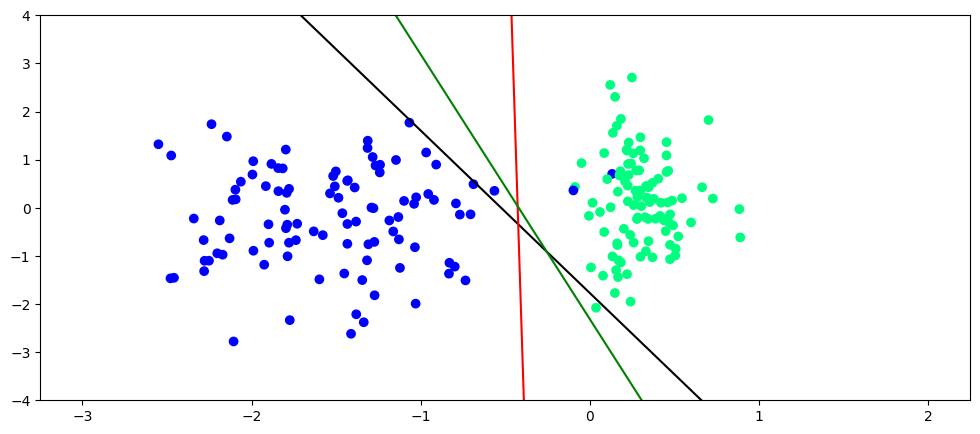

In [120]:
plt.figure(figsize=(12,5))
plt.scatter(x[: , 0] ,  x[: , 1] , c = y , cmap='winter')
plt.plot(x_test , y_pred_perceptron, color = "black")
plt.plot(x_test , y_pred_sklearn , color ="red")
plt.plot(x_test , y_pred_sigmoid , color = 'green')
plt.ylim(-4,4)